In [1]:
import abc

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
np.seterr(all='raise', under='warn')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [5]:
np.set_printoptions(precision=20)

In [6]:
import simple_nn.layers.components.activation as actv
import simple_nn.gd_updater as gd_upd

In [7]:
from simple_nn.layers.nn_layer import FCLayer
from simple_nn.nn_model import *
from simple_nn.cost_function import *

---

test

In [8]:
sample_n = 10000

In [9]:
train_X_org = \
    np.tile(np.linspace(0, np.pi*2, num=50), (sample_n, 1)) \
    + np.tile(np.random.rand(sample_n,1), (1, 50))

In [10]:
train_X = np.sin(train_X_org)

In [11]:
train_X.shape

(10000, 50)

In [12]:
learning_rate = 0.02

In [13]:
gen_model = NNModel(X_shape=3, gd_updater=gd_upd.GDUpdaterNormal(learning_rate=learning_rate), cost_function=None)
gen_model.add_layer(FCLayer(20, True, actv.ActivationLeakyRelu()))
gen_model.add_layer(FCLayer(50, True, actv.ActivationTanh()))
dis_model = NNModel(X_shape=50, gd_updater=gd_upd.GDUpdaterNormal(learning_rate=learning_rate), cost_function=SigmoidCrossEntropy())
dis_model.add_layer(FCLayer(20, True, actv.ActivationLeakyRelu()))
dis_model.add_layer(FCLayer(1, True, actv.ActivationSigmoid()))

In [14]:
m = GANModel(gen_model, dis_model)

In [15]:
%%time
cost = m.fit(train_X, np.ones((len(train_X),1)), epoch=2000, batch_size=100, random_shuffle=True)

Wall time: 6min 46s


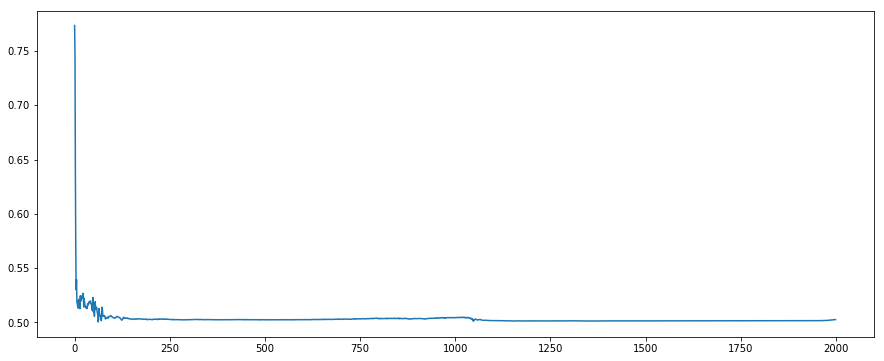

In [16]:
plt.figure(figsize=(15,6))
plt.plot(cost)
plt.show()

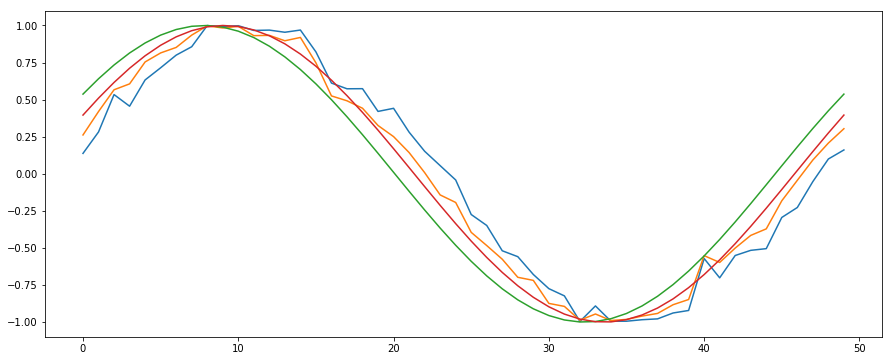

In [17]:
plt.figure(figsize=(15,6))
plt.plot(m.transform(np.random.rand(3)))
plt.plot(m.transform(np.random.rand(3)))
plt.plot(train_X[0])
plt.plot(train_X[1])
plt.show()

In [18]:
m.dis_model.transform(m.transform(np.random.rand(10, 3)))

array([[ 0.50150322568875127516],
       [ 0.50018070954155047225],
       [ 0.50234677281035533536],
       [ 0.50007555519675572775],
       [ 0.5016946649766161892 ],
       [ 0.50021483235320662875],
       [ 0.50185619221330401984],
       [ 0.50314402956460713146],
       [ 0.50187393796601875717],
       [ 0.50040167696298498701]])

In [19]:
m.dis_model.transform(train_X[:10])

array([[ 0.49899437410588876052],
       [ 0.50057076460499494441],
       [ 0.50436555034225016847],
       [ 0.50158956612260507946],
       [ 0.50629713405075760235],
       [ 0.49900184503677408321],
       [ 0.50071173027384618948],
       [ 0.49926576713809384112],
       [ 0.50012859049544278189],
       [ 0.49929768147965403191]])

test - digits

In [20]:
import sklearn.datasets

In [21]:
test_digits = sklearn.datasets.load_digits(return_X_y=False)

In [22]:
test_data_x_org = test_digits['data']
test_data_y_org = test_digits['target']

In [23]:
test_data_x_normalized = test_data_x_org / 8 - 1    # 0~16 ⇒ -1~1

In [24]:
# Binarize labels
test_data_y_normalized = np.zeros((len(test_data_y_org), 10))
test_data_y_normalized[np.arange(len(test_data_y_org)),test_data_y_org] = 1

In [25]:
train_X = np.c_[test_data_y_normalized, test_data_x_normalized]

In [26]:
train_X.shape

(1797, 74)

In [27]:
def gen_noise_with_tag(n, shape=None, spec_param=None):
    r = np.random.rand(n,4)
    labels = np.zeros((n, 10))
    if spec_param is None:
        spec_param = np.random.randint(10, size=n)
    labels[np.arange(n), spec_param] = 1
    data = np.c_[labels, r]
    
    return data, labels

In [41]:
gen_model = NNModel(X_shape=14, gd_updater=gd_upd.GDUpdaterAdam(), cost_function=None)
gen_model.add_layer(FCLayer(30, True, actv.ActivationLeakyRelu()))
gen_model.add_layer(FCLayer(64, True, actv.ActivationTanh()))
dis_model = NNModel(X_shape=74, gd_updater=gd_upd.GDUpdaterAdam(), cost_function=SigmoidCrossEntropy())
dis_model.add_layer(FCLayer(30, True, actv.ActivationLeakyRelu()))
dis_model.add_layer(FCLayer(1, True, actv.ActivationSigmoid()))

In [42]:
m = GANModel(gen_model, dis_model, gen_noise_with_tag)

In [43]:
%%time
cost = m.fit(train_X, np.ones((len(train_X),1)), epoch=20000, batch_size=100, random_shuffle=True)

Wall time: 20min 42s


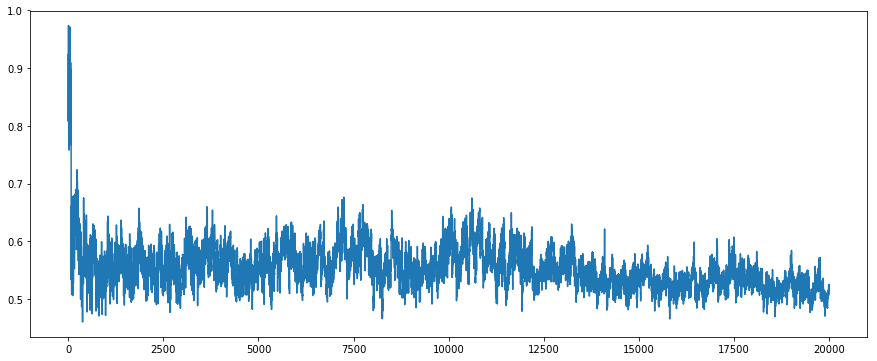

In [44]:
plt.figure(figsize=(15,6))
plt.plot(cost)
plt.show()

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


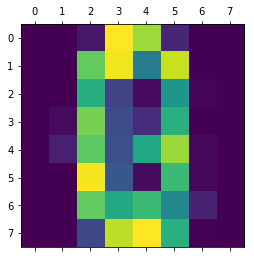

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


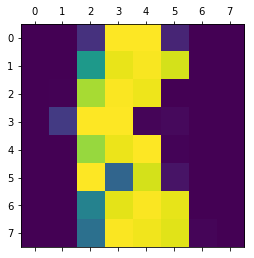

[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


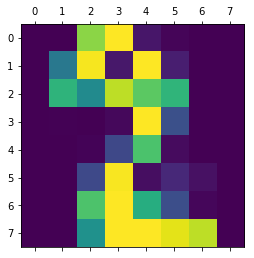

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]


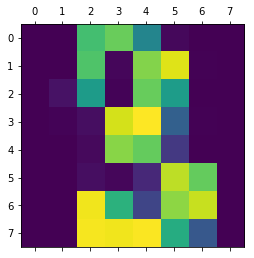

[[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


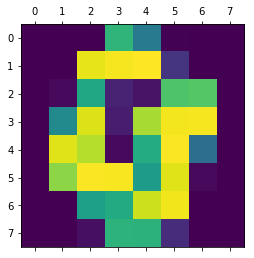

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]


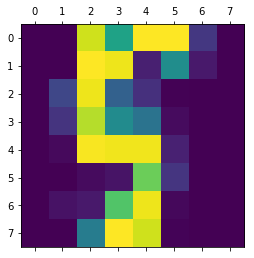

[[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]


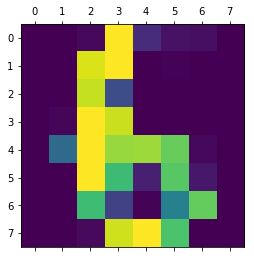

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]


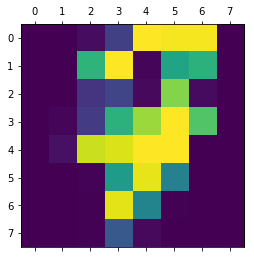

[[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


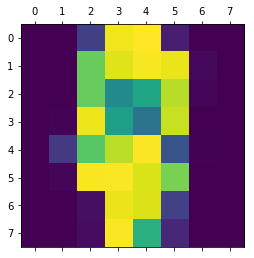

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


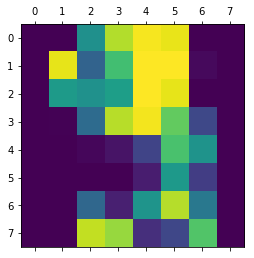

In [46]:
for i in range(10):
    t = gen_noise_with_tag(1, spec_param=i)
    pic = m.transform(t[0]) * 8 + 8
    print(t[1])
    fig = plt.figure(figsize=(1,1))
    plt.matshow(pic.reshape(8,8))
    plt.show()